The missing data in PassengerId is 0
The missing data in Survived is 0
The missing data in Pclass is 0
The missing data in Name is 0
The missing data in Sex is 0
The missing data in Age is 177
The missing data in SibSp is 0
The missing data in Parch is 0
The missing data in Ticket is 0
The missing data in Fare is 0
The missing data in Cabin is 687
The missing data in Embarked is 2
Fixing data
number of survived males is: 109
number of survived females is: 231 
number of females who survived is more than males


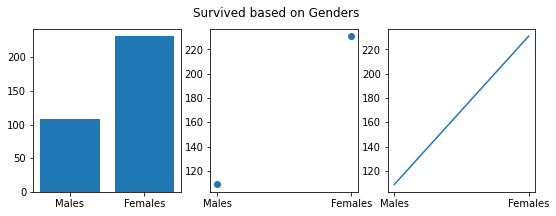

number of survived which travvled in fisrt class is: 134
number of survived which travvled in second class is: 87
number of survived which travvled in third class is: 119


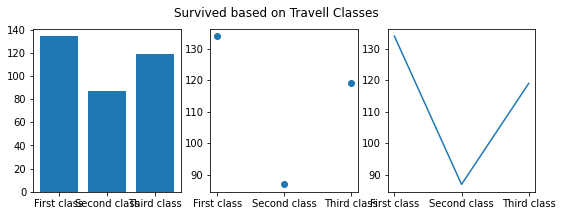

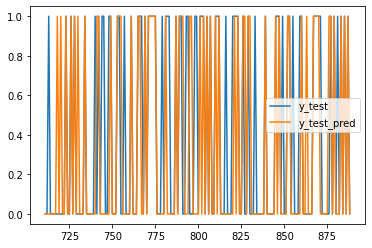

accuracy percentage is : 79.775281
accuracy percentage2 is : 78.651685
accuracy percentage3 is : 80.337079


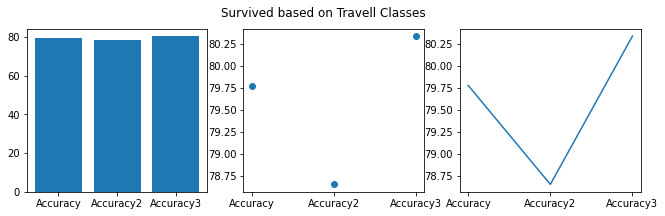

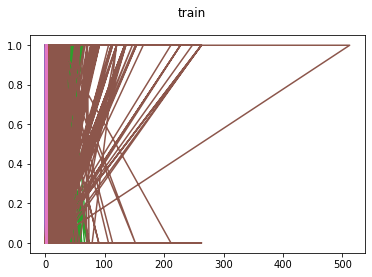

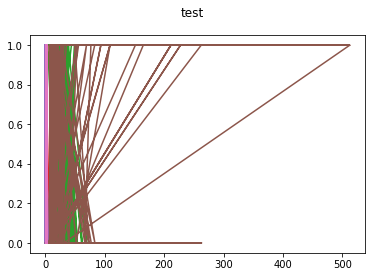

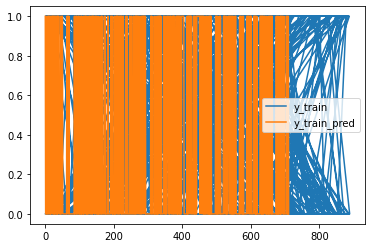

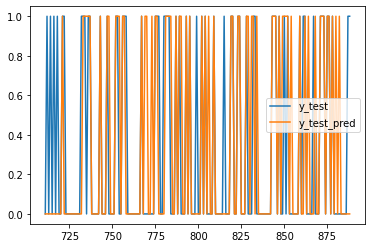

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Read csv file into a pandas dataframe
missing_values = ["n/a", "na", "--", "NaN"]
df = pd.read_csv("TitanicData.csv", index_col = None, na_values = missing_values)
cnt = cnt1 = cnt2 = cnt3 = cnt4 = cnt5 = cnt6 = cnt7 = cnt8 = cnt9 = cnt10 = cnt11 = 0
pssid = df['PassengerId'].isnull()
for i in pssid:
    if i:
        cnt +=1
print("The missing data in PassengerId is %d" %(cnt))
surv = df['Survived'].isnull()
for i in surv:
    if i:
        cnt1 +=1
print("The missing data in Survived is %d" %(cnt1))
pclass = df['Pclass'].isnull()
for i in pclass:
    if i:
        cnt2 +=1
print("The missing data in Pclass is %d" %(cnt2))
name = df['Name'].isnull()
for i in name:
    if i:
        cnt3 +=1
print("The missing data in Name is %d" %(cnt3))
sex = df['Sex'].isnull()
for i in sex:
    if i:
        cnt4 +=1
print("The missing data in Sex is %d" %(cnt4))
age = df['Age'].isnull()
for i in age:
    if i:
        cnt5 +=1
print("The missing data in Age is %d" %(cnt5))
sibsp = df['SibSp'].isnull()
for i in sibsp:
    if i:
        cnt6 +=1
print("The missing data in SibSp is %d" %(cnt6))
parch = df['Parch'].isnull()
for i in parch:
    if i:
        cnt7 +=1
print("The missing data in Parch is %d" %(cnt7))
ticket = df['Ticket'].isnull()
for i in ticket:
    if i:
        cnt8 +=1
print("The missing data in Ticket is %d" %(cnt8))
fare = df['Fare'].isnull()
for i in fare:
    if i:
        cnt9 +=1
print("The missing data in Fare is %d" %(cnt9))
cabin = df['Cabin'].isnull()
for i in cabin:
    if i:
        cnt10 +=1
print("The missing data in Cabin is %d" %(cnt10))
embarked = df['Embarked'].isnull()
for i in embarked:
    if i:
        cnt11 +=1
print("The missing data in Embarked is %d" %(cnt11))


#answering of the part a
print("Fixing data")
#because age missing values are 127, we put the average values in nulls instead
sage = df['Age'].sum(skipna = True)
hcnt = df['Age'].size - cnt5
mean = sage//hcnt
df['Age'] = df['Age'].fillna(mean)
#because cabin missing values are about all we delete entire cabin column
df = df.drop('Cabin', axis=1)
#for rest of the columns like Embarked that missing value it has 2 values
df = df.dropna(how='any',axis=0) 
#save new table
df.to_csv("TitanicData2.csv", index = False)


#part b
df = pd.read_csv("TitanicData2.csv", na_values = missing_values)
survs = smales = sfemales = 0
p1 = p2 = p3 = 0
for index, row in df.iterrows():
    if (row['Survived'] == True):
        survs += 1
        if row['Sex'] == 'male' :
            smales +=1
        elif row['Sex'] == 'female':
            sfemales +=1
        if row['Pclass'] == 1:
            p1 += 1
        elif row['Pclass'] == 2:
            p2+= 1
        elif row['Pclass'] == 3:
            p3 += 1

print("number of survived males is: %d" %smales)
print("number of survived females is: %d " %sfemales)
if sfemales > smales:
    print("number of females who survived is more than males")
elif sfemales < smales:
    print("number of males who survived is more than females")
else:
    print("number of females who survived is equal to males")

names = ['Males', 'Females']
values = []
values.append(smales)
values.append(sfemales)
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Survived based on Genders')
plt.show()


print("number of survived which travvled in fisrt class is: %d" %p1)
print("number of survived which travvled in second class is: %d" %p2)
print("number of survived which travvled in third class is: %d" %p3)
 
names = ['First class', 'Second class', 'Third class']
values = []
values.append(p1)
values.append(p2)
values.append(p3)
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Survived based on Travell Classes')
plt.show()


#part c
#for getting dataset better we can change Gender/Sex to binary
#also we can change Embarked from S,C,Q to 1,2,3
#some table that we dont need is name, Ticket, passenger Id and Cabin already deleted
df['Embarked'] = df['Embarked'].replace(to_replace ="S", value =1)
df['Embarked'] = df['Embarked'].replace(to_replace ="C", value =2)
df['Embarked'] = df['Embarked'].replace(to_replace ="Q", value =3)
df['Sex'] = df['Sex'].replace(to_replace ="male", value =1)
df['Sex'] = df['Sex'].replace(to_replace ="female", value =0)
df = df.drop('Ticket', axis=1)
df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)
#save new table
df.to_csv("TitanicData3.csv", index = False)
df=pd.read_csv("TitanicData3.csv",index_col=None,na_values=missing_values)
x = df.drop("Survived",axis = 1)
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 99)
logistic_regression = LogisticRegression(max_iter=900)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 123)
logistic_regression = LogisticRegression(max_iter=900)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
y_tpred = logistic_regression.predict(X_train)
plt.plot(np.arange(len(y_pred)) + len(y_train),y_test)
plt.plot(np.arange(len(y_pred)) + len(y_train), y_pred)
plt.legend(['y_test', 'y_test_pred'])
plt.show()
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage2 = 100 * accuracy
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 192)
logistic_regression = LogisticRegression(max_iter=900)
logistic_regression.fit(X_train, y_train)
y_tpred = logistic_regression.predict(X_train)
y_pred = logistic_regression.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage3 = 100 * accuracy
print("accuracy percentage is : %f" %accuracy_percentage)
print("accuracy percentage2 is : %f" %accuracy_percentage2)
print("accuracy percentage3 is : %f" %accuracy_percentage3)
names = ['Accuracy', 'Accuracy2', 'Accuracy3']
values = [accuracy_percentage, accuracy_percentage2, accuracy_percentage3]
plt.figure(figsize=(11, 3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Survived based on Travell Classes')
plt.show()
plt.plot(X_train,y_train)
plt.suptitle('train')
plt.show()
plt.plot(X_test,y_pred)
plt.suptitle('test')
plt.show()
plt.plot(y_train)
plt.plot(y_tpred)
plt.legend(['y_train','y_train_pred'])
plt.show()
plt.plot(np.arange(len(y_pred)) + len(y_train),y_test)
plt.plot(np.arange(len(y_pred)) + len(y_train), y_pred)
plt.legend(['y_test', 'y_test_pred'])
plt.show()



In the beginning I have imported all the libraries that I need (seaborn and matplotlib for visualizing). I have printed some few rows to see what I have. I checked all the columns for finding the null values(missing data). I have printed the number of missing values in every column.
For feature age the missing value is 127 , I have calculated the average and replaced it by missing values.I have omitted the cabin column because we had lots of missing values. For rest of my columns like Embarked, I have ommited just those rows the I have missing values. I have saved the new table . 
The second part of the question is asked about the number of survivals based on their gender. I have printed the results. The number of females who survived are more than males. I have put the plots of survived based on genders and travell class.
In the third part of our question I have deleted columns that I think they do not need to be included for predicting. So I use drop function to omit them. At the end I have calculated the accuracy.